## TOC:
* [Set-up](#Set-up)
* [Preprocessing](#2)
* [Feature Engineering](#3)
* [Data Cleaning](#4)
* [Preperation for Model](#5)

## Set-up <a class="anchor" id="Set-up"></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("/Users/noahcampana/Desktop/Studium/Master/Semester 1/Machine Learning/Project/project_data/clean_data.csv")
df.drop(["medication"], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69951 entries, 0 to 69950
Columns: 116 entries, is_male to troglitazone
dtypes: bool(103), float64(6), int64(5), object(2)
memory usage: 13.8+ MB


In [8]:
X = df.drop(columns=["readmitted_binary", "readmitted_multiclass"])
y = df['readmitted_binary']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train)

#transform the data
X_train_scaled = scaler.transform(X_train) # this will return an array

#show results
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val)
X_val_num_scaled = pd.DataFrame(X_val, columns = X_val.columns).set_index(X_val.index)


In [9]:
pd.options.display.max_rows = 400

cor_spearman = X_train_scaled.corr(method ='spearman').abs()
s = cor_spearman.unstack()
so = s.sort_values(ascending=False)
so.head(200)

is_male                                   is_male                                     1.000000
primary_diagnosis_4                       primary_diagnosis_4                         1.000000
medical_specialty_Orthopedics             medical_specialty_Orthopedics               1.000000
medical_specialty_Other                   medical_specialty_Other                     1.000000
medical_specialty_Pediatric               medical_specialty_Pediatric                 1.000000
medical_specialty_Pulmonology             medical_specialty_Pulmonology               1.000000
medical_specialty_Radiology               medical_specialty_Radiology                 1.000000
medical_specialty_Surgery                 medical_specialty_Surgery                   1.000000
admission_source_Emergency Room           admission_source_Emergency Room             1.000000
admission_source_Referral                 admission_source_Referral                   1.000000
admission_source_Transfer                 admissio

In [13]:
#no of features
nof_list=np.arange(1,116)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.809158


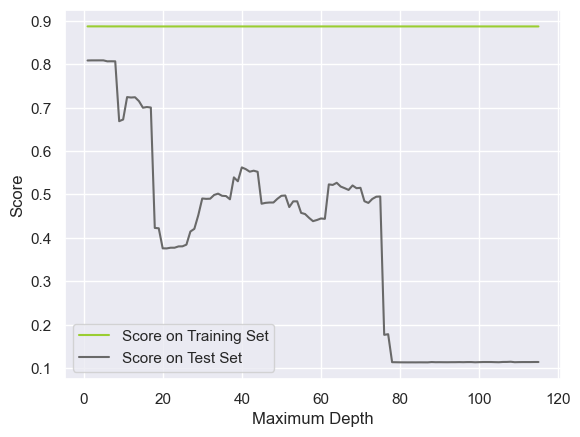

In [14]:
plt.plot(list(range(1,116)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,116)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()